In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz

In [118]:
path = "test_files//20180313-il//tree//min_max_(0,1)//"
trainY=pd.read_csv(path+"trainY.csv",index_col=0)
trainYhat=pd.read_csv("tmp//trainYHat.csv",index_col=0)
testY=pd.read_csv(path+"testY.csv",index_col=0)
testYhat=pd.read_csv("tmp//testYHat.csv",index_col=0)

In [119]:
file="tmp//dif.csv"
df=pd.read_csv(file,index_col=0)
# df=df.drop("dot",axis=1)
df.head()

,generation,epoch,train_error,test_error,sol_index,neurons,dot
id,,,,,,,
0,0,20,11.291708,12.135689,0,6,"digraph G {\r\n{\r\n19 [label="" 19\n b=1.794""]..."
25,1,39,2.009910,31.278042,0,6,"digraph G {\r\n{\r\n19 [label="" 19\n b=1.794""]..."
46,2,58,0.728120,0.446815,0,6,"digraph G {\r\n{\r\n19 [label="" 19\n b=1.794""]..."
46,3,77,0.728120,0.446815,0,6,"digraph G {\r\n{\r\n19 [label="" 19\n b=1.794""]..."
46,4,96,0.728120,0.446815,0,6,"digraph G {\r\n{\r\n19 [label="" 19\n b=1.794""]..."


In [120]:
fitness_by_generation_min = df.groupby(by="generation").train_error.min()
fitness_by_generation_testmin = df.groupby(by="generation").test_error.min()

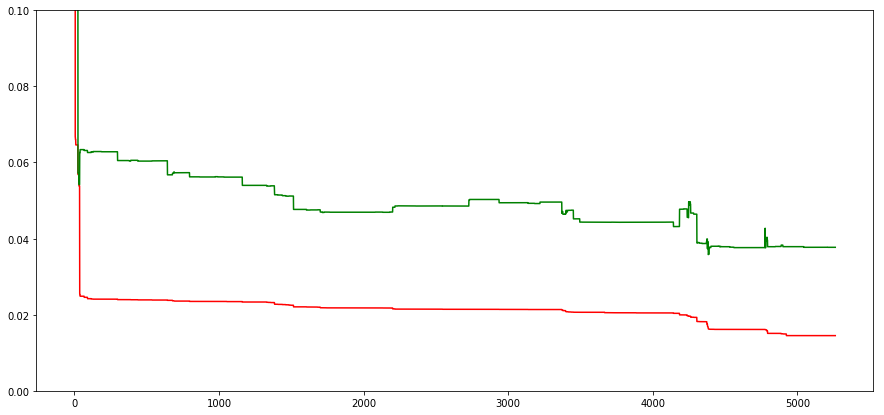

In [121]:
# plt.gca().set_ylim([0,0.1])
plt.figure(figsize=(15,7))
plt.gca().set_ylim([0,0.1])
plt.plot(fitness_by_generation_min,"r")
plt.plot(fitness_by_generation_testmin,"g")
plt.show()

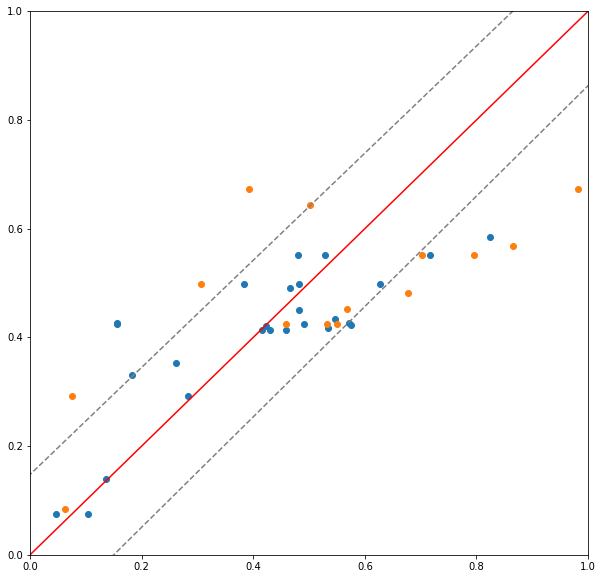

In [122]:
plt.figure(figsize=(10,10))
plt.axis([0, 1.0, 0, 1.0])
plt.plot([-10,10],[-10,10],"r")
plt.plot([-10.3,10],[-10,10],'--', color = 'gray')
plt.plot([-9.7,10],[-10,10],'--', color = 'gray')
# plt.plot([-10,10],[-10,10],"r")
plt.scatter(trainY.values,trainYhat.values)
plt.scatter(testY.values,testYhat.values)
plt.savefig("tmp//residuals.pdf")

In [36]:
def best_of_generation(gen=df.generation.max()):
    return df[df.generation == gen].sort_values(by="train_error").iloc[0]
def plot_dot(gen=df.generation.max()):
    return graphviz.Source(best_of_generation(gen)["dot"])

In [ ]:
plot_dot(30)

In [18]:
a=(best_of_generation()["dot"])
f = open('tmp//topology.txt','w')
f.write(a)
f.close()

In [ ]:
plot_dot()

In [19]:
plot_dot().render("tmp//topology")

'tmp//topology.pdf'